In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
import dateutil
import statsmodels
import statsmodels.api as sm
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn import metrics,preprocessing  
from sklearn.model_selection import train_test_split,RepeatedKFold
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,perceptron,Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
sns.set()
pd.options.display.max_columns = None

d:\installed\pycharmedu4.0.1\anaconda\envs\virtusa\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
dataset_path = "D:\Installed\Git_kraken_repos\Virtusa\datasets\Final\\"

In [3]:
df = pd.read_csv(dataset_path+"dataset.csv")
df

,admission_location,admission_type,discharge_location,ethnicity,insurance,marital_status,religion,gender,LENGTH_OF_STAY,AGE,AGE_BINS,LENGTH_OF_STAY_BINS,TOTAL_COST,PAYABLE,GAP,ICU_LOS,1 int mam-cor art bypass,Aortocor bypas-2 cor art,Aortocor bypas-3 cor art,Coronar arteriogr-2 cath,Extracorporeal circulat,Left heart cardiac cath,Lt heart angiocardiogram,Packed cell transfusion,Rt/left heart card cath,Venous cath NEC
0,PHYS REFERRAL/NORMAL DELI,ELECTIVE,HOME HEALTH CARE,WHITE,Medicare,MARRIED,CATHOLIC,Male,5,71.0,"(70.2, 77.9]","(3.5, 7.0]",4437.0,1024.0,3413.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,HOME,WHITE,Private,SINGLE,PROTESTANT QUAKER,Male,2,39.0,"(31.7, 39.4]","(-0.035, 3.5]",6080.0,1024.0,5056.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,PHYS REFERRAL/NORMAL DELI,ELECTIVE,HOME HEALTH CARE,WHITE,Medicare,MARRIED,CATHOLIC,Male,5,74.0,"(70.2, 77.9]","(3.5, 7.0]",4472.0,1024.0,3448.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,PHYS REFERRAL/NORMAL DELI,ELECTIVE,HOME HEALTH CARE,WHITE,Medicare,DIVORCED,CATHOLIC,Female,10,69.0,"(62.5, 70.2]","(7.0, 10.5]",8186.0,1100.0,7086.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,CLINIC REFERRAL/PREMATURE,EMERGENCY,HOME HEALTH CARE,WHITE,Medicare,MARRIED,NOT SPECIFIED,Male,8,69.0,"(62.5, 70.2]","(7.0, 10.5]",7036.0,1024.0,6012.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
5,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,LONG TERM CARE HOSPITAL,WHITE,Medicare,WIDOWED,CATHOLIC,Male,25,75.0,"(70.2, 77.9]","(24.5, 28.0]",30131.0,1068.0,29063.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,HOME,OTHERS,Self Pay,MARRIED,BUDDHIST,Male,3,48.0,"(47.1, 54.8]","(-0.035, 3.5]",3154.0,3154.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,EMERGENCY ROOM ADMIT,EMERGENCY,SNF,WHITE,Medicare,WIDOWED,UNOBTAINABLE,Female,6,85.0,"(77.9, 85.6]","(3.5, 7.0]",29056.0,1024.0,28032.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,CLINIC REFERRAL/PREMATURE,EMERGENCY,HOME,WHITE,Private,MARRIED,JEWISH,Male,7,59.0,"(54.8, 62.5]","(3.5, 7.0]",7129.0,1068.0,6061.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
9,CLINIC REFERRAL/PREMATURE,EMERGENCY,SNF,OTHERS,Medicare,MARRIED,CATHOLIC,Male,7,80.0,"(77.9, 85.6]","(3.5, 7.0]",5465.0,1024.0,4441.0,4.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [4]:
df.religion.fillna('NOT SPECIFIED',inplace=True)
df.religion = df.religion.apply(lambda x : "NOT SPECIFIED" if x == "UNOBTAINABLE" else x)
def filter_religion(val):
    if val not in ["CATHOLIC","PROTESTANT QUAKER","NOT SPECIFIED","JEWISH"]:
        return "OTHER"
    else:
        return val
df.religion = df.religion.apply(filter_religion)
df.marital_status.fillna('UNKNOWN (DEFAULT)',inplace=True)
df

,admission_location,admission_type,discharge_location,ethnicity,insurance,marital_status,religion,gender,LENGTH_OF_STAY,AGE,AGE_BINS,LENGTH_OF_STAY_BINS,TOTAL_COST,PAYABLE,GAP,ICU_LOS,1 int mam-cor art bypass,Aortocor bypas-2 cor art,Aortocor bypas-3 cor art,Coronar arteriogr-2 cath,Extracorporeal circulat,Left heart cardiac cath,Lt heart angiocardiogram,Packed cell transfusion,Rt/left heart card cath,Venous cath NEC
0,PHYS REFERRAL/NORMAL DELI,ELECTIVE,HOME HEALTH CARE,WHITE,Medicare,MARRIED,CATHOLIC,Male,5,71.0,"(70.2, 77.9]","(3.5, 7.0]",4437.0,1024.0,3413.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,HOME,WHITE,Private,SINGLE,PROTESTANT QUAKER,Male,2,39.0,"(31.7, 39.4]","(-0.035, 3.5]",6080.0,1024.0,5056.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,PHYS REFERRAL/NORMAL DELI,ELECTIVE,HOME HEALTH CARE,WHITE,Medicare,MARRIED,CATHOLIC,Male,5,74.0,"(70.2, 77.9]","(3.5, 7.0]",4472.0,1024.0,3448.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,PHYS REFERRAL/NORMAL DELI,ELECTIVE,HOME HEALTH CARE,WHITE,Medicare,DIVORCED,CATHOLIC,Female,10,69.0,"(62.5, 70.2]","(7.0, 10.5]",8186.0,1100.0,7086.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,CLINIC REFERRAL/PREMATURE,EMERGENCY,HOME HEALTH CARE,WHITE,Medicare,MARRIED,NOT SPECIFIED,Male,8,69.0,"(62.5, 70.2]","(7.0, 10.5]",7036.0,1024.0,6012.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
5,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,LONG TERM CARE HOSPITAL,WHITE,Medicare,WIDOWED,CATHOLIC,Male,25,75.0,"(70.2, 77.9]","(24.5, 28.0]",30131.0,1068.0,29063.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,TRANSFER FROM HOSP/EXTRAM,EMERGENCY,HOME,OTHERS,Self Pay,MARRIED,OTHER,Male,3,48.0,"(47.1, 54.8]","(-0.035, 3.5]",3154.0,3154.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,EMERGENCY ROOM ADMIT,EMERGENCY,SNF,WHITE,Medicare,WIDOWED,NOT SPECIFIED,Female,6,85.0,"(77.9, 85.6]","(3.5, 7.0]",29056.0,1024.0,28032.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,CLINIC REFERRAL/PREMATURE,EMERGENCY,HOME,WHITE,Private,MARRIED,JEWISH,Male,7,59.0,"(54.8, 62.5]","(3.5, 7.0]",7129.0,1068.0,6061.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
9,CLINIC REFERRAL/PREMATURE,EMERGENCY,SNF,OTHERS,Medicare,MARRIED,CATHOLIC,Male,7,80.0,"(77.9, 85.6]","(3.5, 7.0]",5465.0,1024.0,4441.0,4.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [5]:
def plot_univariate(df,columns=None):
    '''Function plots distribution of all the columns specified.
    
    Parameters
    ----------
    df -> The pandas dataframe
    columns -> the specific list of columns you want to plot. All if not specified.
    '''
    if columns==None:
        columns=df.columns
    for column in columns:
        if (df[column].dtype == 'float') or ('int' in str(df[column].dtype)):
            df[column].plot.hist()
            plt.title("Histogram of "+column)
            plt.xlabel(column)
            plt.ylabel('Frequency')
        elif df[column].dtype == 'object':
            df[column].value_counts(sort=False).plot.bar()
            plt.title("Distribution of "+column)
            plt.xlabel(column)
            plt.ylabel('Frequency')
        else:
            print("Unable to plot column "+column)
            continue
        plt.show()
def plot_bivariate(df,target,columns=None,box=True,pie=True,bar=True,scatter=False,ylim=70000):
    '''Function plots the bivariate graph of all the columns specified against the quantative target variable
    
    Parameters
    ----------
    df -> The pandas dataframe
    target -> The target variable you want to plot against
    columns -> the specific list of columns you want to plot. All if not specified.
    BOX,PIE,BAR,scatter are the types of plots. If value is true, then the type will be plotted for all columns
    Note:
    pie chart will be plotted for the contribution of each class for the value in target variable, i.e, sum of total cost for each class
    bar is similarly plotted for the mean of the total cost for each class
    '''
    if columns==None:
        columns=df.columns
    assert df[target].dtype=='float',"This function can only be used with a quantative target variable"
    if box:
        for column in columns:
            if df[column].dtype=="object":
                df.boxplot(column = target,by=column,sym='')
                plt.title('')
                plt.ylabel(target)
                plt.ylim(0,ylim)
                plt.show()
    if pie:
        for column in columns:
            if df[column].dtype=="object":
                df.groupby(column)[target].sum().plot.pie(autopct='%1.0f%%')
                plt.title("Contribution of each "+column+" for "+target)
                plt.ylabel(" ")
                plt.show()
    if bar:
        for column in columns:
            if df[column].dtype=='object':
                df.groupby(column)[target].mean().plot.bar()
                plt.title("Mean of the "+ target+" for each "+column)
                plt.show()
    if scatter:
        for column in columns:
            if df[column].dtype!='object':
                sns.regplot(x=column, y=target, data=df,fit_reg=False)
                plt.title("Correlation of "+column+" and "+target)
                plt.ylabel(target)
                plt.show()

In [6]:
def plot_multi(df,columns=None,target="TOTAL_COST"):
    '''Function plots the multivariate graph of all the columns specified against the quantative target variable by making combinations of two
    
    Parameters
    ----------
    df -> The pandas dataframe
    target -> The target variable you want to plot against
    columns -> the specific list of columns you want to plot. All if not specified.
    '''
    if columns==None:
        columns=df.columns
    combinations = list(itertools.combinations(columns,2))
    for a,b in combinations:
        flag=0
        comb=[a,b]
        for x in comb:
            if df[x].dtype !="object":
                flag=1
        if flag==0:
            df.groupby([*comb])[target].mean().plot.bar()
            #sns.barplot(x = a, y = target ,hue = b, data = df)
            plt.title(",".join(comb)+" correlation with "+target)
            plt.show()

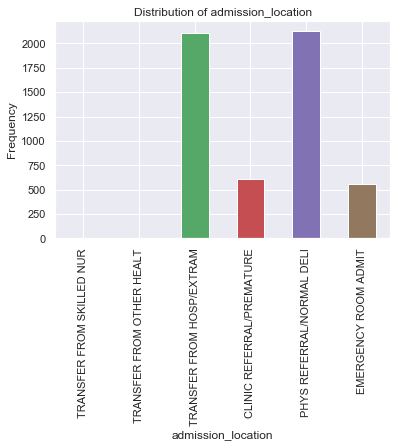

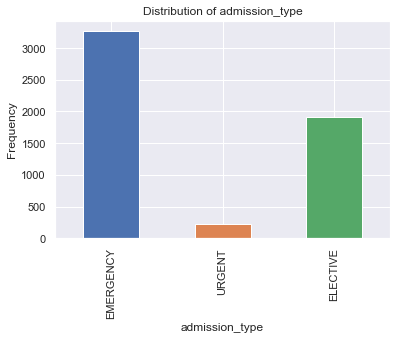

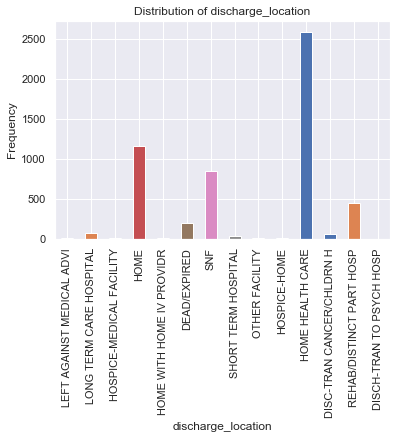

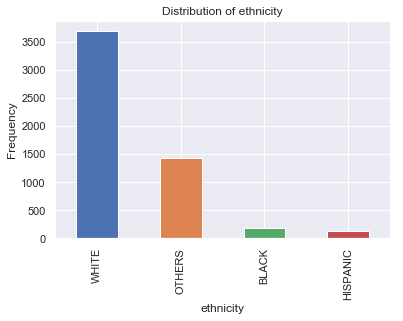

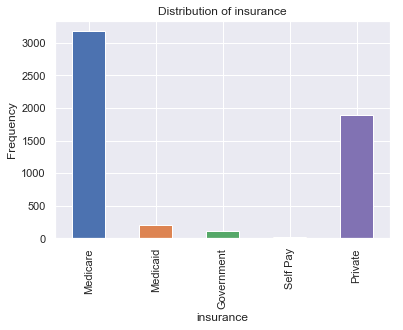

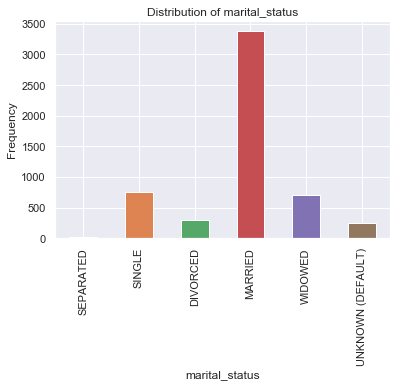

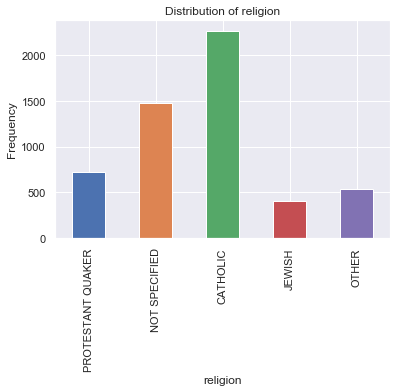

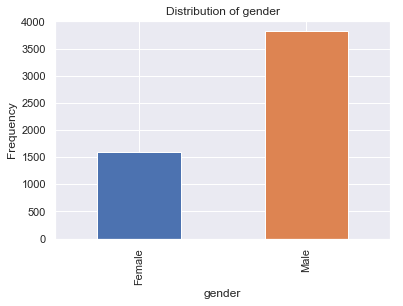

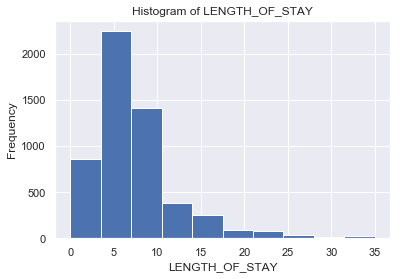

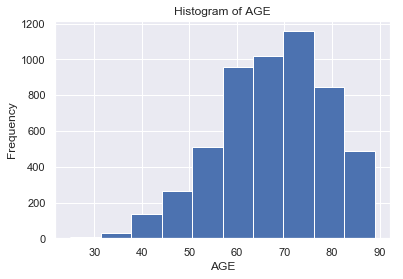

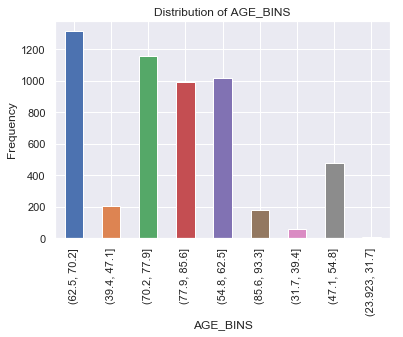

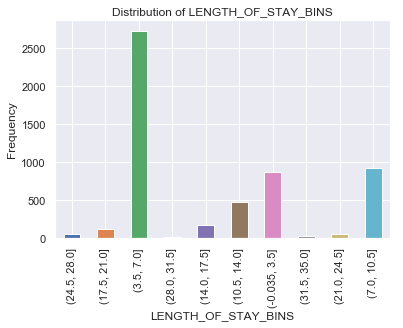

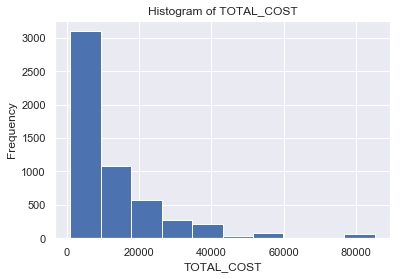

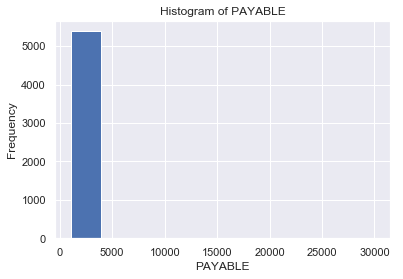

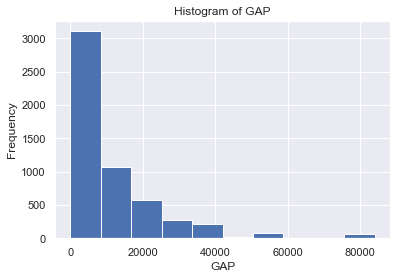

In [7]:
plot_univariate(df.iloc[:,:15])

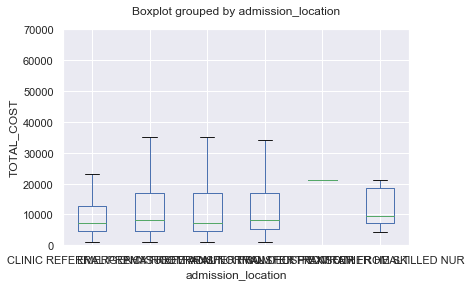

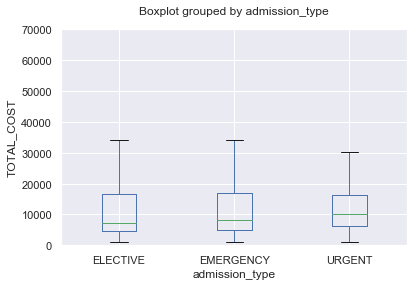

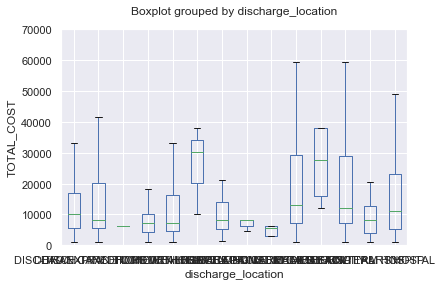

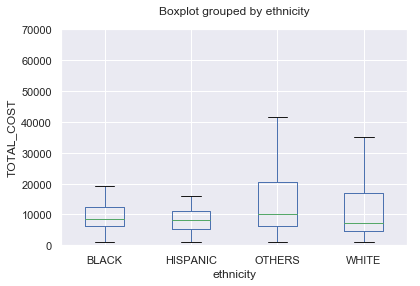

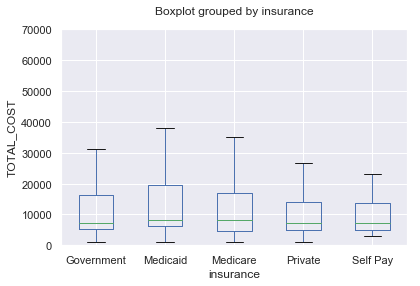

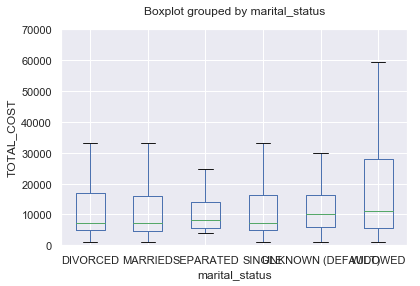

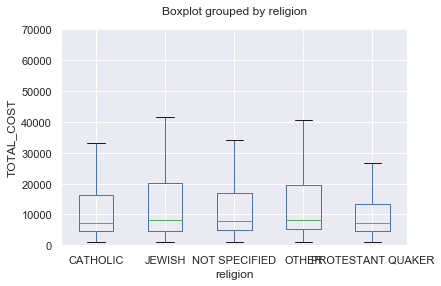

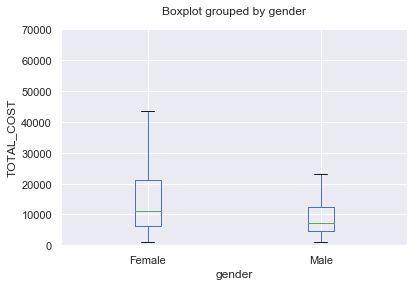

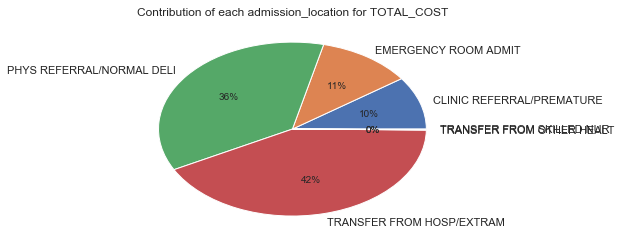

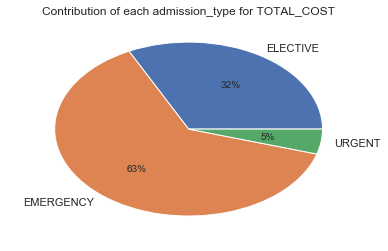

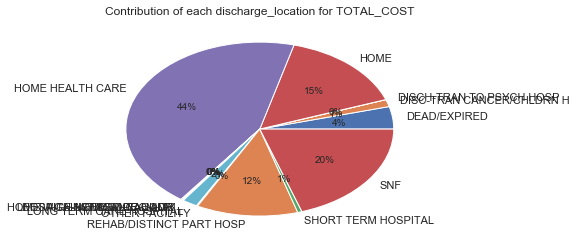

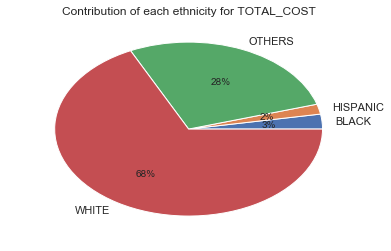

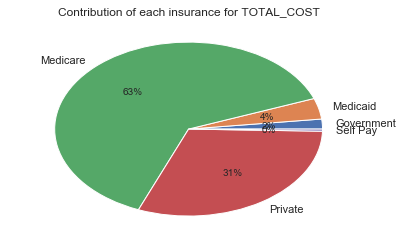

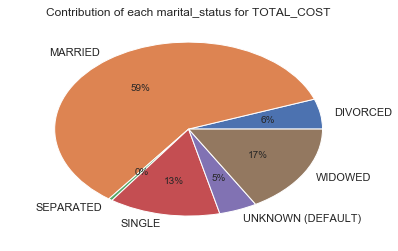

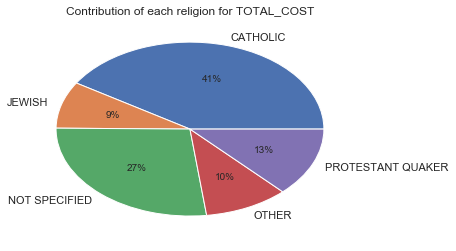

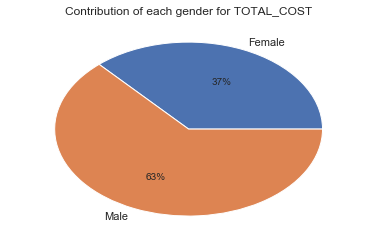

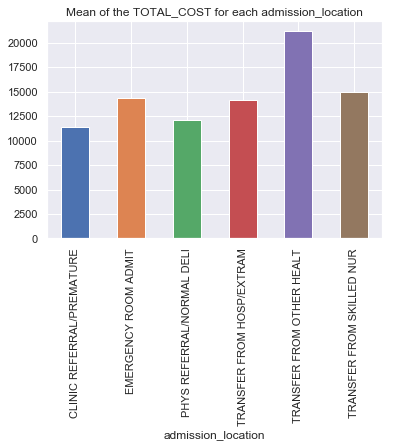

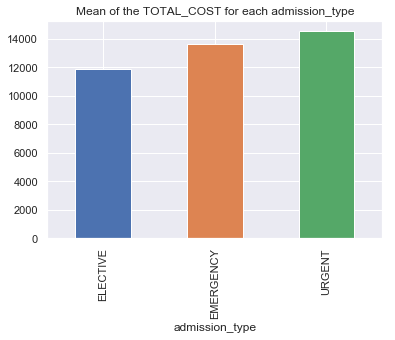

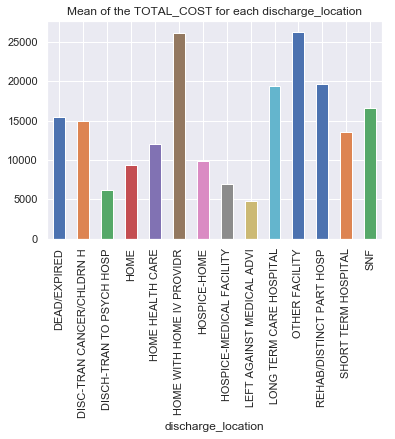

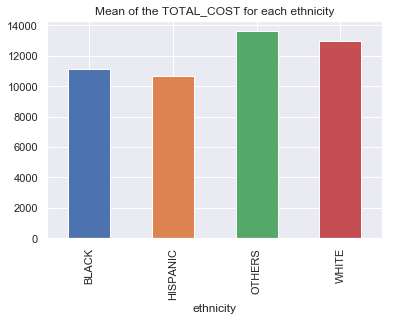

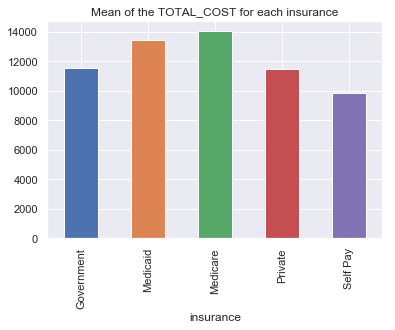

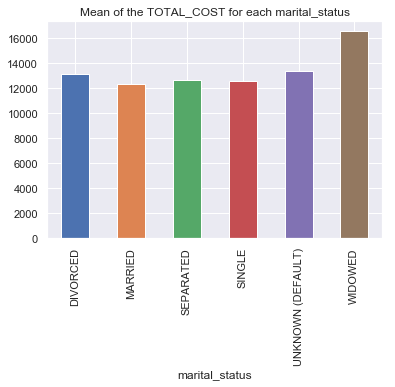

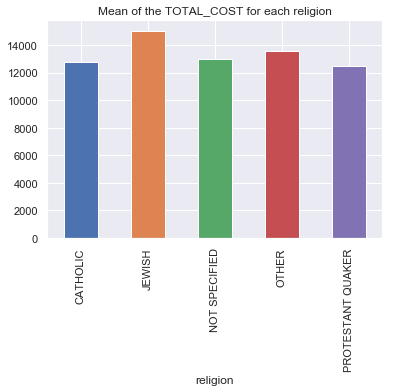

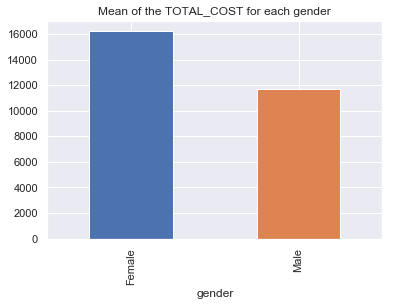

In [8]:
plot_bivariate(df.iloc[:,:15].drop(columns = ["AGE_BINS","LENGTH_OF_STAY_BINS"]),"TOTAL_COST")

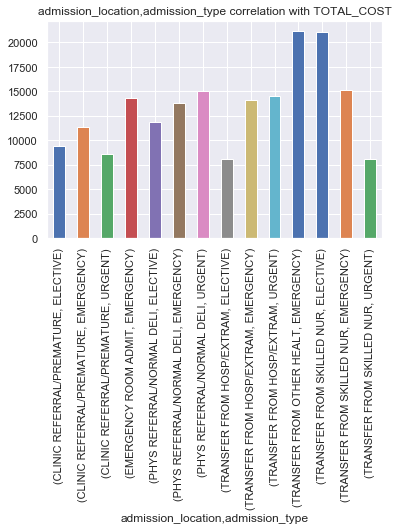

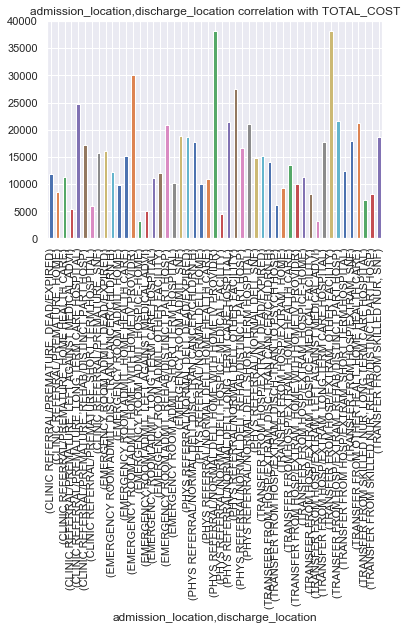

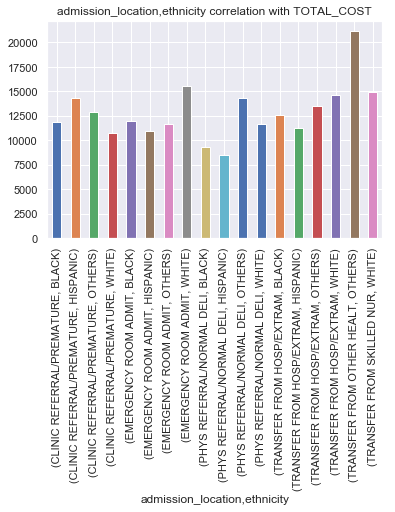

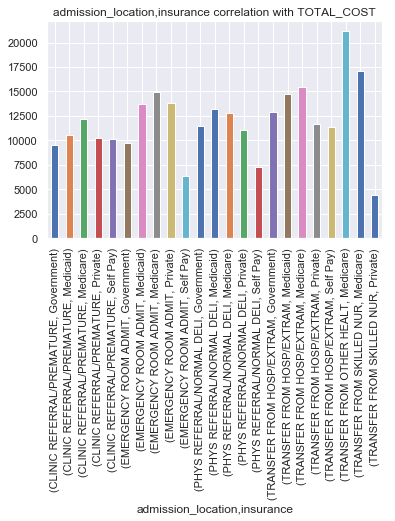

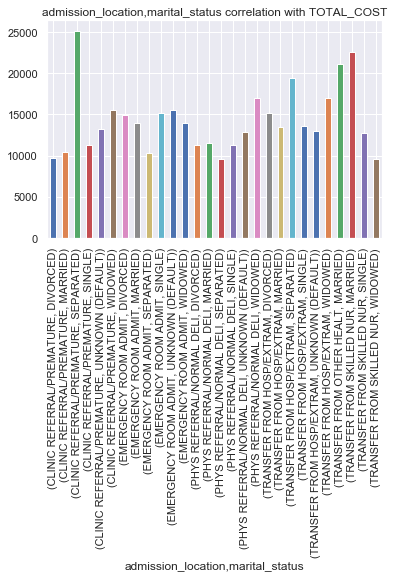

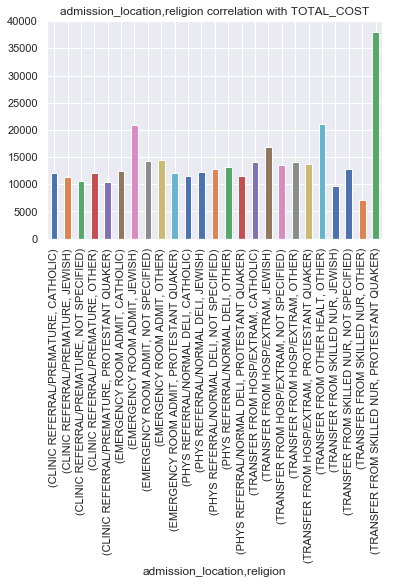

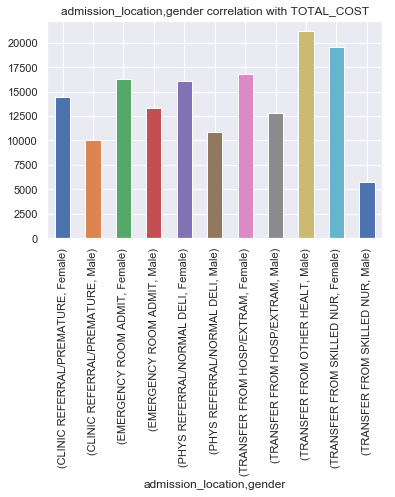

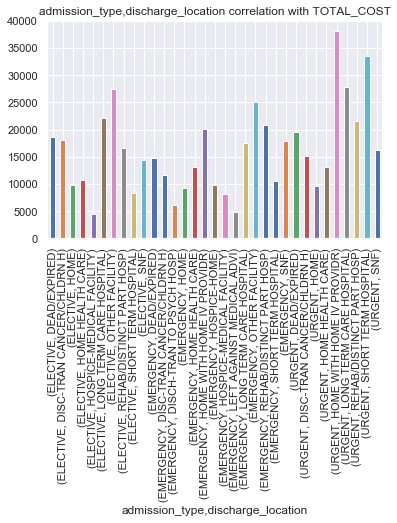

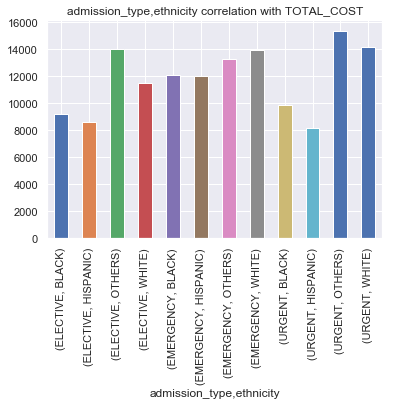

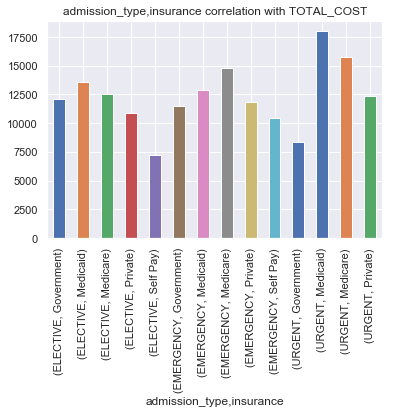

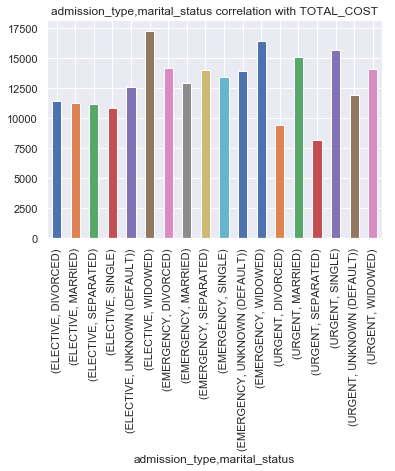

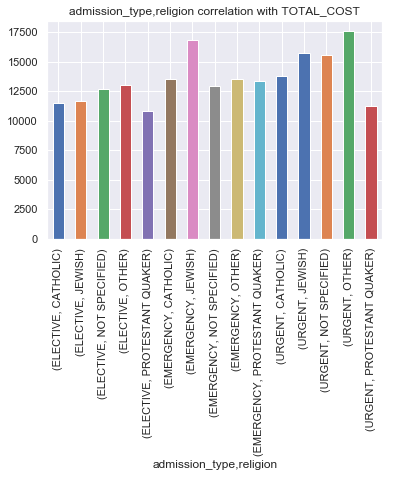

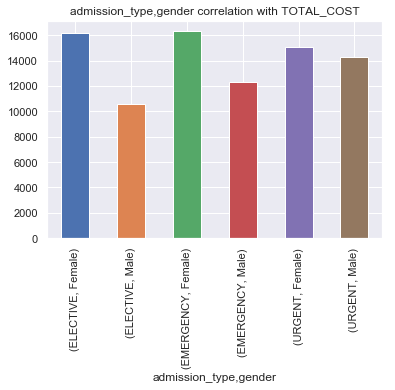

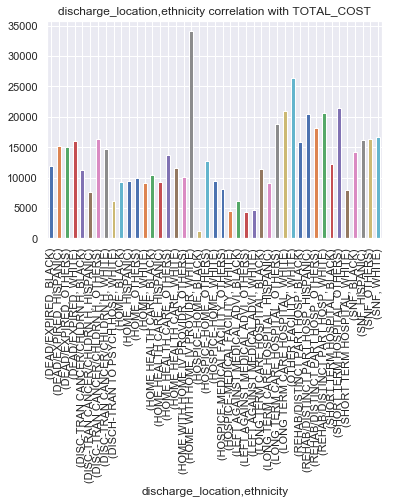

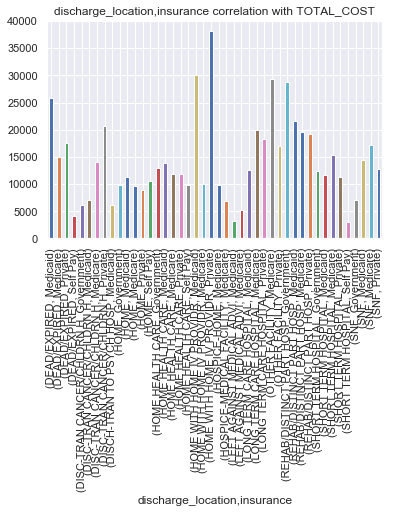

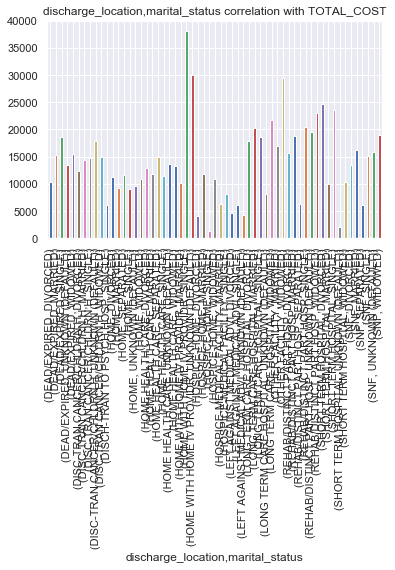

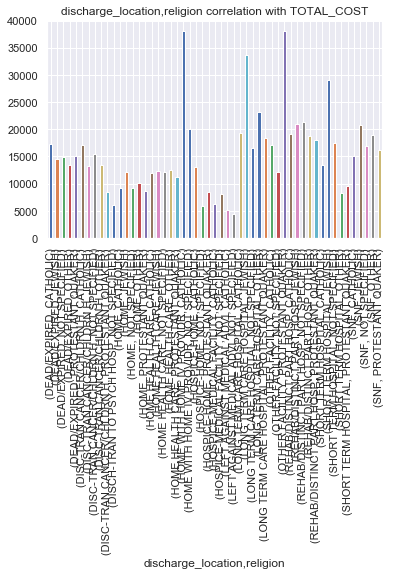

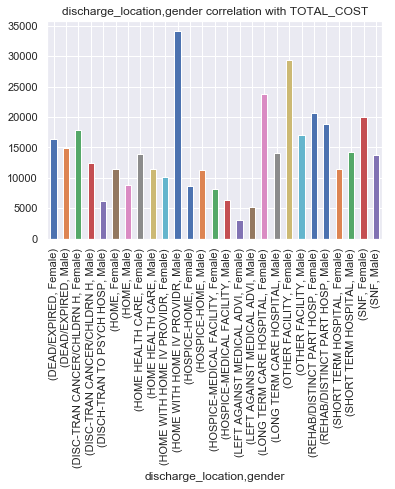

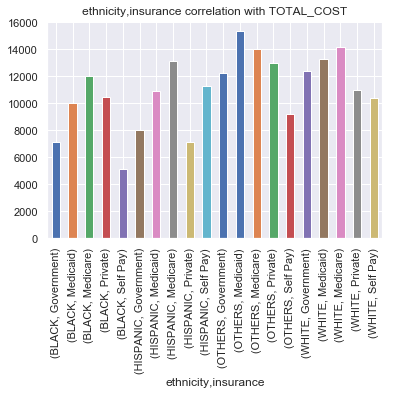

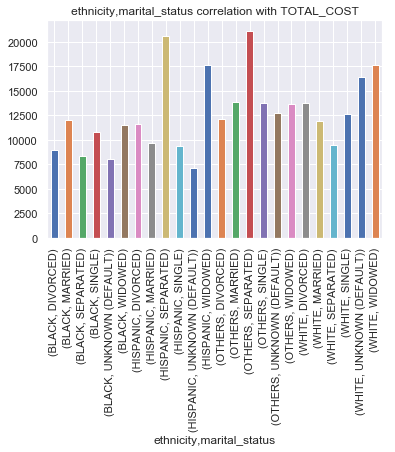

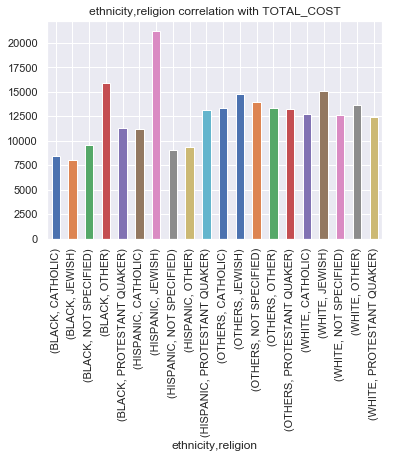

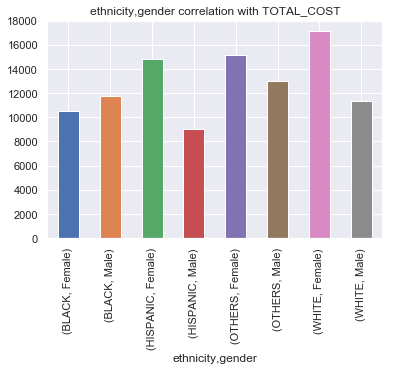

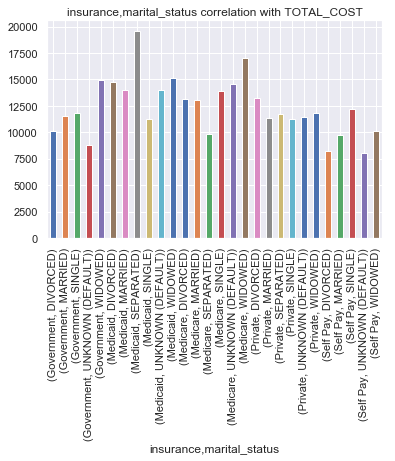

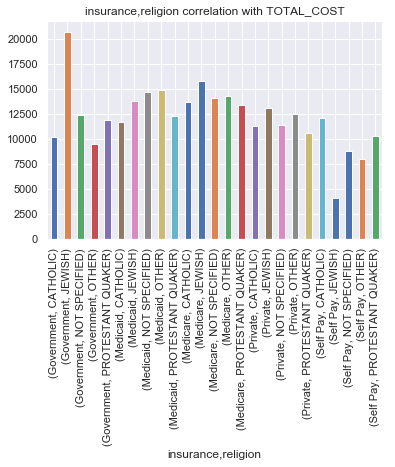

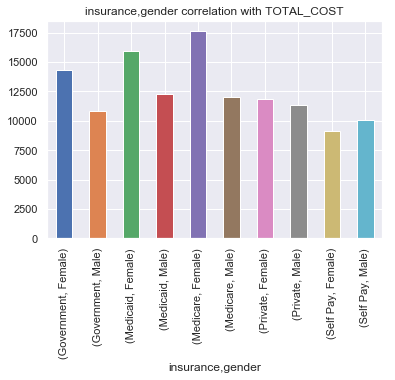

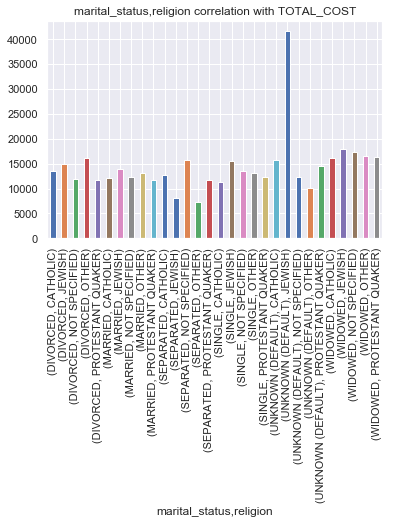

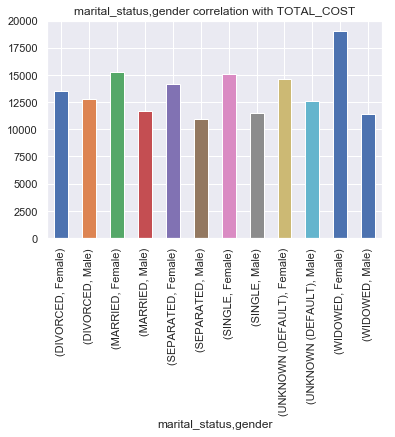

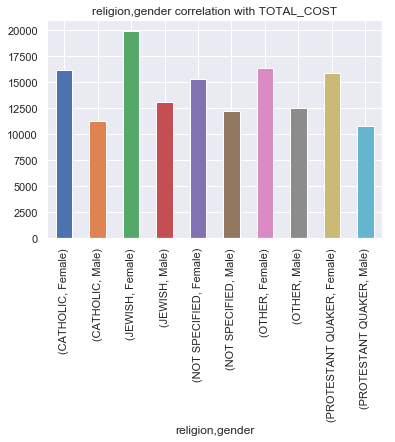

In [9]:
plot_multi(df.iloc[:,:15].drop(columns = ["AGE_BINS","LENGTH_OF_STAY_BINS"]))

Checking if the total cost is normally distributed:-

In [10]:
stats.normaltest(df.TOTAL_COST)

NormaltestResult(statistic=2988.029466691772, pvalue=0.0)

The extremely low p value suggests that total cost is not normally distributed

In [11]:
def kruskal_wallis_wrapper(df,target,columns=None,verbose=False,alpha=0.05):
    '''Function performs the Kruskal-Wallis H-test of all the columns with the target variable.
    The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA.
    
    Parameters
    ----------
    df -> The pandas dataframe
    target -> The target variable you want to test for
    columns -> the specific list of columns you want test. All if not specified.
    '''
    if columns == None:
        columns = [x for x in df.columns if df[x].dtype=='object']
    assert df[target].dtype=='float',"This function can only be used with a quantative target variable"
    for column in columns:
        assert df[column].dtype == 'object',"This function is intended for categorical indipendent variables"
    useful_columns = []
    for column in columns:
            print("For "+column+" :-")
            groups = df.groupby(column)
            data = [groups.get_group(x)[target] for x in groups.groups]
            res = scipy.stats.kruskal(*data)
            if verbose:
                print(res)
            if res.pvalue < alpha :
                print("Reject null hypothesis\n----------------")
                useful_columns.append(column)
            else:
                print("Accept null hypothesis\n----------------")
    print("According to the test, the useful columns are :-\n"+",".join(useful_columns))
            

Since the independent variable is a categorical variable and dependent variable is a quantative non normally distributed variable, we use the kruskal wallis test to see if there is a difference in the median of the total cost in the two different genders.

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA

In [12]:
kruskal_wallis_wrapper(df,"TOTAL_COST",verbose=True)

For admission_location :-
KruskalResult(statistic=39.16647516867752, pvalue=2.198471208713383e-07)
Reject null hypothesis
----------------
For admission_type :-
KruskalResult(statistic=21.151909386250175, pvalue=2.5522383841704736e-05)
Reject null hypothesis
----------------
For discharge_location :-
KruskalResult(statistic=328.24845757076, pvalue=2.8886368357885857e-62)
Reject null hypothesis
----------------
For ethnicity :-
KruskalResult(statistic=108.47801097893307, pvalue=2.3327044186509567e-23)
Reject null hypothesis
----------------
For insurance :-
KruskalResult(statistic=25.736261313458726, pvalue=3.576512835750136e-05)
Reject null hypothesis
----------------
For marital_status :-
KruskalResult(statistic=98.48869834119289, pvalue=1.1002962206685648e-19)
Reject null hypothesis
----------------
For religion :-
KruskalResult(statistic=15.503230593937719, pvalue=0.003763608748734432)
Reject null hypothesis
----------------
For gender :-
KruskalResult(statistic=207.38096753094274, 

Another way to perform tests is to transform the data to a normally distributed value. We can do this using the boxcox module of scipy
The Box-Cox transform is given by:

y = (x**lmbda - 1) / lmbda,  for lmbda > 0
    log(x),                  for lmbda = 0

lambda can be supplied, or the method will automatically find the lambda that maximizes the log-likelihood function

d:\installed\pycharmedu4.0.1\anaconda\envs\virtusa\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


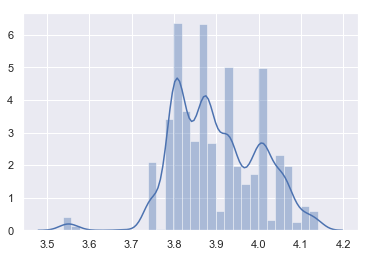

In [13]:
from scipy.stats import boxcox
data = df.TOTAL_COST
boxcox(data,0)
sns.distplot(boxcox(data)[0])
plt.show()

Box cox will transform the data into a normally distributed data

In [14]:
stats.normaltest(boxcox(data)[0])

NormaltestResult(statistic=9.817984302615004, pvalue=0.0073799224296871024)

Add this as the normally distributed value of the total cost

In [15]:
df["TOTAL_COST_NORMAL"] = boxcox(df.TOTAL_COST)[0]
stats.normaltest(df.TOTAL_COST_NORMAL)

NormaltestResult(statistic=9.817984302615004, pvalue=0.0073799224296871024)

In [16]:
def anova_wrapper(df,target,columns=None,verbose=False,alpha=0.05):
    '''Function performs the anova test of all the columns with the target variable.
    The anova test tests the null hypothesis that the population median of all of the groups are equal.
    
    Parameters
    ----------
    df -> The pandas dataframe
    target -> The target variable you want to test for
    columns -> the specific list of columns you want test. All if not specified.
    '''
    if columns == None:
        columns = [x for x in df.columns if df[x].dtype=='object']
    assert df[target].dtype=='float',"This function can only be used with a quantative target variable"
    for column in columns:
        assert df[column].dtype == 'object',"This function is intended for categorical indipendent variables"
    useful_columns = []
    for column in columns:
            print("For "+column+" :-")
            groups = df.groupby(column)
            data = [groups.get_group(x)[target] for x in groups.groups]
            res = scipy.stats.f_oneway(*data)
            if verbose:
                print(res)
            if res.pvalue < alpha :
                print("Reject null hypothesis\n----------------")
                useful_columns.append(column)
            else:
                print("Accept null hypothesis\n----------------")
    print("According to the test, the useful columns are :-\n"+", ".join(useful_columns))

In [17]:
anova_wrapper(df,"TOTAL_COST_NORMAL",verbose=True)

For admission_location :-
F_onewayResult(statistic=6.257135665929097, pvalue=8.536744495931419e-06)
Reject null hypothesis
----------------
For admission_type :-
F_onewayResult(statistic=8.33554531316174, pvalue=0.0002429326908796579)
Reject null hypothesis
----------------
For discharge_location :-
F_onewayResult(statistic=25.914587535879164, pvalue=4.969142345937407e-62)
Reject null hypothesis
----------------
For ethnicity :-
F_onewayResult(statistic=12.540265608630996, pvalue=3.61702782581577e-08)
Reject null hypothesis
----------------
For insurance :-
F_onewayResult(statistic=8.438523433177517, pvalue=8.768387460784524e-07)
Reject null hypothesis
----------------
For marital_status :-
F_onewayResult(statistic=17.19548267907295, pvalue=6.436126743778246e-17)
Reject null hypothesis
----------------
For religion :-
F_onewayResult(statistic=3.436329624428139, pvalue=0.008207076028689744)
Reject null hypothesis
----------------
For gender :-
F_onewayResult(statistic=211.58499756831108

In [18]:
def pearson_wrapper(df,target,columns=None,verbose=False,alpha=0.05):
    '''Function performs the pearson correlation test of all the columns with the target variable.
    The anova test tests the null hypothesis that the population median of all of the groups are equal.
    
    Parameters
    ----------
    df -> The pandas dataframe
    target -> The target variable you want to test for
    columns -> the specific list of columns you want test. All if not specified.
    '''
    if columns == None:
        columns = [x for x in df.columns if df[x].dtype=='float']
    assert df[target].dtype=='float',"This function can only be used with a quantative target variable"
    for column in columns:
        assert df[column].dtype == 'float',"This function is intended for quantative indipendent variables"
    useful_columns = []
    for column in columns:
            if column == target:
                continue
            print("For "+column+" :-")
            res = scipy.stats.pearsonr(df[column],df[target])
            if verbose:
                print(res)
            if res[1] < alpha :
                print("Reject null hypothesis\n----------------")
                useful_columns.append(column)
            else:
                print("Accept null hypothesis\n----------------")
    print("According to the test, the useful columns are :-\n"+", ".join(useful_columns))

The Pearson correlation coefficient measures the linear relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

In [19]:
df["LENGTH_OF_STAY"] = df["LENGTH_OF_STAY"].astype('float')
df["ICU_LOS"] = df["ICU_LOS"].astype('float')
pearson_wrapper(df.drop(columns=["TOTAL_COST","PAYABLE","GAP"]),"TOTAL_COST_NORMAL")

For LENGTH_OF_STAY :-
Reject null hypothesis
----------------
For AGE :-
Reject null hypothesis
----------------
For ICU_LOS :-
Reject null hypothesis
----------------
For 1 int mam-cor art bypass :-
Accept null hypothesis
----------------
For Aortocor bypas-2 cor art :-
Accept null hypothesis
----------------
For Aortocor bypas-3 cor art :-
Accept null hypothesis
----------------
For Coronar arteriogr-2 cath :-
Accept null hypothesis
----------------
For Extracorporeal circulat :-
Reject null hypothesis
----------------
For Left heart cardiac cath :-
Accept null hypothesis
----------------
For Lt heart angiocardiogram :-
Reject null hypothesis
----------------
For Packed cell transfusion :-
Reject null hypothesis
----------------
For Rt/left heart card cath :-
Accept null hypothesis
----------------
For Venous cath NEC :-
Reject null hypothesis
----------------
According to the test, the useful columns are :-
LENGTH_OF_STAY, AGE, ICU_LOS, Extracorporeal circulat, Lt heart angiocardiog

In [20]:
df.drop("TOTAL_COST_NORMAL",inplace=True,axis=1)

Using other techniques for feature selection :-

1)Recursive feature elimination

2)Best features selection using extra trees regressors

Since we have categorical columns, we need to convert that into numeric columns in order to feed it to the model. Hence we use sklearn's lable encoder for this

In [21]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                if output[colname].dtype == 'object':
                    print("Encoding "+colname)
                    output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
encoding_pipeline = Pipeline([
('encoding',MultiColumnLabelEncoder())
# add more pipeline steps as needed
])
labeled_df = encoding_pipeline.fit_transform(df)
labeled_df

Encoding admission_location
Encoding admission_type
Encoding discharge_location
Encoding ethnicity
Encoding insurance
Encoding marital_status
Encoding religion
Encoding gender
Encoding AGE_BINS
Encoding LENGTH_OF_STAY_BINS


,admission_location,admission_type,discharge_location,ethnicity,insurance,marital_status,religion,gender,LENGTH_OF_STAY,AGE,AGE_BINS,LENGTH_OF_STAY_BINS,TOTAL_COST,PAYABLE,GAP,ICU_LOS,1 int mam-cor art bypass,Aortocor bypas-2 cor art,Aortocor bypas-3 cor art,Coronar arteriogr-2 cath,Extracorporeal circulat,Left heart cardiac cath,Lt heart angiocardiogram,Packed cell transfusion,Rt/left heart card cath,Venous cath NEC
0,2,0,4,3,2,1,0,1,5.0,71.0,6,7,4437.0,1024.0,3413.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3,1,3,3,3,3,4,1,2.0,39.0,1,0,6080.0,1024.0,5056.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,0,4,3,2,1,0,1,5.0,74.0,6,7,4472.0,1024.0,3448.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2,0,4,3,2,0,0,0,10.0,69.0,5,9,8186.0,1100.0,7086.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,1,4,3,2,1,2,1,8.0,69.0,5,9,7036.0,1024.0,6012.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
5,3,1,9,3,2,5,0,1,25.0,75.0,6,5,30131.0,1068.0,29063.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,3,1,3,2,4,1,3,1,3.0,48.0,3,0,3154.0,3154.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,1,13,3,2,5,2,0,6.0,85.0,7,7,29056.0,1024.0,28032.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,1,3,3,3,1,1,1,7.0,59.0,4,7,7129.0,1068.0,6061.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
9,0,1,13,2,2,1,0,1,7.0,80.0,7,7,5465.0,1024.0,4441.0,4.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [22]:
features_labeled = labeled_df.drop(columns = ["TOTAL_COST","PAYABLE","GAP"])
target_labeled = labeled_df[["TOTAL_COST","PAYABLE","GAP"]]

In [23]:
def cat_encoder(df,columns=None):
    if columns == None:
        columns = [x for x in df.columns if df[x].dtype == 'object']
    df1 = df.copy()
    for column in columns:
        df1 = pd.concat([df1,df1[column].str.get_dummies()],axis=1)
    df1 = df1.drop(columns = columns)
    return df1

encoded_df = cat_encoder(df).drop(columns = ["LENGTH_OF_STAY","AGE"])
encoded_df

,TOTAL_COST,PAYABLE,GAP,ICU_LOS,1 int mam-cor art bypass,Aortocor bypas-2 cor art,Aortocor bypas-3 cor art,Coronar arteriogr-2 cath,Extracorporeal circulat,Left heart cardiac cath,Lt heart angiocardiogram,Packed cell transfusion,Rt/left heart card cath,Venous cath NEC,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,PHYS REFERRAL/NORMAL DELI,TRANSFER FROM HOSP/EXTRAM,TRANSFER FROM OTHER HEALT,TRANSFER FROM SKILLED NUR,ELECTIVE,EMERGENCY,URGENT,DEAD/EXPIRED,DISC-TRAN CANCER/CHLDRN H,DISCH-TRAN TO PSYCH HOSP,HOME,HOME HEALTH CARE,HOME WITH HOME IV PROVIDR,HOSPICE-HOME,HOSPICE-MEDICAL FACILITY,LEFT AGAINST MEDICAL ADVI,LONG TERM CARE HOSPITAL,OTHER FACILITY,REHAB/DISTINCT PART HOSP,SHORT TERM HOSPITAL,SNF,BLACK,HISPANIC,OTHERS,WHITE,Government,Medicaid,Medicare,Private,Self Pay,DIVORCED,MARRIED,SEPARATED,SINGLE,UNKNOWN (DEFAULT),WIDOWED,CATHOLIC,JEWISH,NOT SPECIFIED,OTHER,PROTESTANT QUAKER,Female,Male,"(23.923, 31.7]","(31.7, 39.4]","(39.4, 47.1]","(47.1, 54.8]","(54.8, 62.5]","(62.5, 70.2]","(70.2, 77.9]","(77.9, 85.6]","(85.6, 93.3]","(-0.035, 3.5]","(10.5, 14.0]","(14.0, 17.5]","(17.5, 21.0]","(21.0, 24.5]","(24.5, 28.0]","(28.0, 31.5]","(3.5, 7.0]","(31.5, 35.0]","(7.0, 10.5]"
0,4437.0,1024.0,3413.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,6080.0,1024.0,5056.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,4472.0,1024.0,3448.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,8186.0,1100.0,7086.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,7036.0,1024.0,6012.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,30131.0,1068.0,29063.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
6,3154.0,3154.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,29056.0,1024.0,28032.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
8,7129.0,1068.0,6061.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,5465.0,1024.0,4441.0,4.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [24]:
features_onehot = encoded_df.drop(columns=["TOTAL_COST","PAYABLE","GAP"])
target_onehot = encoded_df[["TOTAL_COST","PAYABLE","GAP"]]
features_onehot

,ICU_LOS,1 int mam-cor art bypass,Aortocor bypas-2 cor art,Aortocor bypas-3 cor art,Coronar arteriogr-2 cath,Extracorporeal circulat,Left heart cardiac cath,Lt heart angiocardiogram,Packed cell transfusion,Rt/left heart card cath,Venous cath NEC,CLINIC REFERRAL/PREMATURE,EMERGENCY ROOM ADMIT,PHYS REFERRAL/NORMAL DELI,TRANSFER FROM HOSP/EXTRAM,TRANSFER FROM OTHER HEALT,TRANSFER FROM SKILLED NUR,ELECTIVE,EMERGENCY,URGENT,DEAD/EXPIRED,DISC-TRAN CANCER/CHLDRN H,DISCH-TRAN TO PSYCH HOSP,HOME,HOME HEALTH CARE,HOME WITH HOME IV PROVIDR,HOSPICE-HOME,HOSPICE-MEDICAL FACILITY,LEFT AGAINST MEDICAL ADVI,LONG TERM CARE HOSPITAL,OTHER FACILITY,REHAB/DISTINCT PART HOSP,SHORT TERM HOSPITAL,SNF,BLACK,HISPANIC,OTHERS,WHITE,Government,Medicaid,Medicare,Private,Self Pay,DIVORCED,MARRIED,SEPARATED,SINGLE,UNKNOWN (DEFAULT),WIDOWED,CATHOLIC,JEWISH,NOT SPECIFIED,OTHER,PROTESTANT QUAKER,Female,Male,"(23.923, 31.7]","(31.7, 39.4]","(39.4, 47.1]","(47.1, 54.8]","(54.8, 62.5]","(62.5, 70.2]","(70.2, 77.9]","(77.9, 85.6]","(85.6, 93.3]","(-0.035, 3.5]","(10.5, 14.0]","(14.0, 17.5]","(17.5, 21.0]","(21.0, 24.5]","(24.5, 28.0]","(28.0, 31.5]","(3.5, 7.0]","(31.5, 35.0]","(7.0, 10.5]"
0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
6,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
8,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,4.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


Recursive feature elimination:-

Given an external estimator that assigns weights to features (e.g., the
coefficients of a linear model), the goal of recursive feature elimination
(RFE) is to select features by recursively considering smaller and smaller
sets of features. First, the estimator is trained on the initial set of
features and the importance of each feature is obtained either through a
``coef_`` attribute or through a ``feature_importances_`` attribute.
Then, the least important features are pruned from current set of features.
That procedure is recursively repeated on the pruned set until the desired
number of features to select is eventually reached.

In [25]:
#Considering he labeled set of features 
X, y = features_labeled,target_labeled["TOTAL_COST"]
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 5, step=1)
selector = selector.fit(X, y)
selector.support_ 

array([False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True, False, False])

In [26]:
print("Top 5 features for Linear regression:-")
print(",".join(list(features_labeled.columns[selector.support_])))
print("\nFeature reanking:-")
print("\n".join([str((x,y)) for x,y in zip(features_labeled.columns,selector.ranking_)]))

Top 5 features for Linear regression:-
gender,LENGTH_OF_STAY,LENGTH_OF_STAY_BINS,Extracorporeal circulat,Packed cell transfusion

Feature reanking:-
('admission_location', 12)
('admission_type', 4)
('discharge_location', 18)
('ethnicity', 14)
('insurance', 13)
('marital_status', 10)
('religion', 19)
('gender', 1)
('LENGTH_OF_STAY', 1)
('AGE', 17)
('AGE_BINS', 6)
('LENGTH_OF_STAY_BINS', 1)
('ICU_LOS', 15)
('1 int mam-cor art bypass', 8)
('Aortocor bypas-2 cor art', 7)
('Aortocor bypas-3 cor art', 11)
('Coronar arteriogr-2 cath', 16)
('Extracorporeal circulat', 1)
('Left heart cardiac cath', 3)
('Lt heart angiocardiogram', 5)
('Packed cell transfusion', 1)
('Rt/left heart card cath', 2)
('Venous cath NEC', 9)


Another method to do feature selection automatically is to use the "select from model" module:-

In [27]:
#Considering the one hot encoded features
from sklearn.feature_selection import SelectFromModel
X, y = features_onehot,target_onehot["TOTAL_COST"]
print("Initial Shape:-")
print(X.shape)

Initial Shape:-
(5412, 75)


In [28]:
clf = ExtraTreesRegressor()
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
print("Reduced feature set:-")
print(X_new.shape)

Reduced feature set:-
(5412, 16)


In [29]:
#Similarly for linear Regression
clf = LinearRegression()
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(5412, 23)

We can create a pipeline in order to perform the standdard scaling,feature selection,and nonlinear transformations and fit the model

In [30]:
clf = Pipeline([
  ('std',preprocessing.StandardScaler()),
  ('transform', preprocessing.QuantileTransformer()),
  ('feature_selection', SelectFromModel(ExtraTreesRegressor(bootstrap=True))),
  ('Regression', ExtraTreesRegressor(max_depth=8,bootstrap=True))
])
clf.fit(X, y)
clf.score(X,y)

0.8971632736733648

Trying out different Models:-

In [31]:
def create_pipe_model(model,std=preprocessing.StandardScaler(),transform=preprocessing.QuantileTransformer()):
    '''
    Returns a pipeline with the 4 steps:-
    1)Standard scaling
    2)Non linear transformation
    3)Feature selection
    4)Regression
    '''
    return Pipeline([
                  ('std',std),
                  ('transform', transform),
                  ('feature_selection', SelectFromModel(model)),
                  ('Regression', model)
                    ])
def reg_metric(y,y_pred):
    """
    Returns a dictionary with various metrics for evaluating a regression model
    """
    result = {}
    try:
        result["Explained_variance_score"] = metrics.explained_variance_score(y,y_pred)
        result["Mean_absolute_error"] = metrics.mean_absolute_error(y,y_pred)
        result["Mean_squared_error"] = metrics.mean_squared_error(y,y_pred)
        result["Mean_squared_log_error"] = metrics.mean_squared_log_error(y,y_pred)
    except:
        pass
    return result
def run_model(model,X,y,test_size=0.3,verbose=False,pipeline=True,return_model =False):
    """
    Parameters :-
    Model : The regression model
    X : The features
    Y : The targets
    test size : the size of the testing set
    -----------------------------------------
    fits the given regression model and prints the training and testing metrics
    """
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,random_state = 20)
    clf = model
    if pipeline:
        clf = create_pipe_model(model)  
    clf.fit(X_train,y_train)
    print("Training set stats : ",reg_metric(y_train,clf.predict(X_train)))
    print("Testing set stats : ",reg_metric(y_test,clf.predict(X_test)))
    if verbose==True:
        print(y_test,clf.predict(X_test))
    if return_model:
        return clf

In [32]:
X, y = features_onehot,target_onehot["TOTAL_COST"]

Considered Models:-

1)Ridge regression :- 
This model solves a regression model where the loss function is
the linear least squares function and regularization is given by
the l2-norm. Also known as Ridge Regression or Tikhonov regularization

In [33]:
run_model(Ridge(),X,y)

Training set stats :  {'Explained_variance_score': 0.34432429724495073, 'Mean_absolute_error': 7093.441346171435, 'Mean_squared_error': 109959336.81075278, 'Mean_squared_log_error': 0.5162661778731459}
Testing set stats :  {'Explained_variance_score': 0.3628924870139658, 'Mean_absolute_error': 7332.181001304319, 'Mean_squared_error': 117863099.81241752, 'Mean_squared_log_error': 0.5191753414395047}


2)Extra Tress Regressor :- This class implements a meta estimator that fits a number of
randomized decision trees (a.k.a. extra-trees) on various sub-samples
of the dataset and use averaging to improve the predictive accuracy
and control over-fitting.

In [34]:
run_model(ExtraTreesRegressor(bootstrap=True,max_depth=8),X,y)

Training set stats :  {'Explained_variance_score': 0.9037470825764491, 'Mean_absolute_error': 2464.182652790273, 'Mean_squared_error': 16143357.361192307, 'Mean_squared_log_error': 0.1526449387788259}
Testing set stats :  {'Explained_variance_score': 0.8835276575223225, 'Mean_absolute_error': 2589.5844417970766, 'Mean_squared_error': 21568051.9056536, 'Mean_squared_log_error': 0.15602468573257877}


3)Lasso regression:-

Linear Model trained with L1 prior as regularizer (aka the Lasso)

The optimization objective for Lasso is::

    (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Technically the Lasso model is optimizing the same objective function as
the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).

In [35]:
run_model(Lasso(),X,y)

Training set stats :  {'Explained_variance_score': 0.3687963874624006, 'Mean_absolute_error': 6841.752299637922, 'Mean_squared_error': 105855273.17170563, 'Mean_squared_log_error': 0.5137632768878038}
Testing set stats :  {'Explained_variance_score': 0.3771851207490532, 'Mean_absolute_error': 7166.900106647146, 'Mean_squared_error': 115118569.23100875, 'Mean_squared_log_error': 0.5219574523297329}


4)Elastic net:-
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * L1 + b * L2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty.

In [36]:
run_model(ElasticNet(),X,y)

Training set stats :  {'Explained_variance_score': 0.1450341777674936, 'Mean_absolute_error': 8259.943570478801, 'Mean_squared_error': 143381056.23484975, 'Mean_squared_log_error': 0.6281547693935353}
Testing set stats :  {'Explained_variance_score': 0.1516193107501247, 'Mean_absolute_error': 8602.042968974973, 'Mean_squared_error': 157146748.37718332, 'Mean_squared_log_error': 0.6294504302456746}


5)Multilayer perceptron regressor:-

In [37]:
mlp_total_cost = run_model(MLPRegressor(hidden_layer_sizes=(100,100,200,450),activation='relu'),X,y,pipeline=False,return_model=True)

Training set stats :  {'Explained_variance_score': 0.9892208008613779, 'Mean_absolute_error': 952.7769072280571, 'Mean_squared_error': 1819749.1096875814, 'Mean_squared_log_error': 0.03656873169123502}
Testing set stats :  {'Explained_variance_score': 0.8467186234708473, 'Mean_absolute_error': 2704.6593122089753, 'Mean_squared_error': 28321014.11546069, 'Mean_squared_log_error': 0.13846131349181348}


6)Linear Regression using the Ordinary least squares

In [38]:
run_model(create_pipe_model(LinearRegression(),transform=None),X,y,pipeline=False)

Training set stats :  {'Explained_variance_score': 0.3293019104561826, 'Mean_absolute_error': 7152.5488015846395, 'Mean_squared_error': 112478648.84744535, 'Mean_squared_log_error': 0.5228781766712258}
Testing set stats :  {'Explained_variance_score': 0.3459460045096937, 'Mean_absolute_error': 7452.110548950326, 'Mean_squared_error': 120903237.69051737, 'Mean_squared_log_error': 0.5317472772866053}


Best scores were observed for Multilayer perceptron and Extra trees regressor

We will choose MLP for the prediction of the total cost with a testing Explained variance score of 0.84

Prediction of the GAP amount:-

In [39]:
X,y = features_onehot[:],target_onehot["GAP"]

In [40]:
mlp_gap = run_model(MLPRegressor(hidden_layer_sizes=(100,100,200,450),activation='relu'),X,y,pipeline=False,return_model=True)

Training set stats :  {'Explained_variance_score': 0.9935254099708185, 'Mean_absolute_error': 728.0007863365147, 'Mean_squared_error': 1104312.8769413794}
Testing set stats :  {'Explained_variance_score': 0.8919666952660572, 'Mean_absolute_error': 2164.637035031389, 'Mean_squared_error': 20021379.985992942, 'Mean_squared_log_error': 0.45964133016795206}


d:\installed\pycharmedu4.0.1\anaconda\envs\virtusa\lib\site-packages\sklearn\metrics\regression.py:314: RuntimeWarning: invalid value encountered in log
  return mean_squared_error(np.log(y_true + 1), np.log(y_pred + 1),


In [41]:
run_model(ExtraTreesRegressor(max_depth=8),X,y)

Training set stats :  {'Explained_variance_score': 0.8519072291383656, 'Mean_absolute_error': 3011.8366871752355, 'Mean_squared_error': 24896551.409153022, 'Mean_squared_log_error': 0.8835644365564366}
Testing set stats :  {'Explained_variance_score': 0.8468536473810783, 'Mean_absolute_error': 3028.6325060222052, 'Mean_squared_error': 28309455.278451096, 'Mean_squared_log_error': 0.8842773511420658}


Best scores were observed for Multilayer perceptron and Extra trees regressor

We will choose MLP for the prediction of the total cost with a testing Explained variance score of 0.90

Finally we can save the models into a pickle file and use them later

In [42]:
from sklearn.externals import joblib
models_path = "D:\Installed\Git_kraken_repos\Virtusa\datasets\models\\"
joblib.dump(mlp_total_cost,models_path+"Total_cost_predictor.pkl")
joblib.dump(mlp_gap,models_path+"Gap_predictor.pkl")

['D:\\Installed\\Git_kraken_repos\\Virtusa\\datasets\\models\\Gap_predictor.pkl']